# Модуль А.  Парсинг и предобработка данных

### 1.1 Парсинг данных

*Импортируем необходимы библиотеки для дальнейших действий:*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from tqdm import notebook
import requests
import re
import os
%matplotlib inline
import glob
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.stem import wordnet 
from nltk import pos_tag  
from nltk import word_tokenize 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import pairwise_distances 
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
import zipfile
import xml.etree.ElementTree as ET
import docx
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

*Для начало импортируем данные из представленной папки. Они изначально имеют расширение json, так как dataframe лучше рабоет с расширение csv, передем эти файлы в другую папку с данным расширением.Так, как файлов большое количество, импорт будет сделан через корневую дерикторию.*

In [2]:
modules = glob.glob('data\*.json')

In [3]:
data_json=[]
for i in modules:
    data_json=pd.read_json(i)
    data_json.to_csv(f'meeting/data.csv')

In [4]:
data=pd.read_csv("meeting/data.csv")

In [5]:
def first_letter(input_str):
    end=input_str.partition('{')[2]
    return end

In [6]:
def first_kow_letter(input_str):
    end=input_str.partition("'")[2]
    return end

In [7]:
def one_kow_letter(input_str):
    end=input_str.partition("'")[0]
    return end

In [8]:
def one_letter(input_str):
    end=input_str.partition('}')[2]
    return end

In [9]:
def one_letter_dvac(input_str):
    end=input_str.partition(':')[2]
    return end

In [10]:
def one_starr_letter(input_str):
    end=input_str.partition('}')[0]
    return end

In [11]:
def fist_letter(input_str):
    end=input_str.partition('{')[0]
    return end

In [12]:
def zip_star_letter(input_str):
    end=input_str.partition(',')[0]
    return end

In [13]:
def zip_fish_letter(input_str):
    end=input_str.partition(',')[2]
    return end

In [14]:
data['data']=data['refs'].apply(first_letter)
data['refs']=data['refs'].apply(fist_letter)
data['data_1']=data['data'].apply(one_letter)
data['day']=data['data'].apply(zip_star_letter)
data["day"]=data["day"].apply(one_letter_dvac)

In [15]:
data['data_3']=data['data'].apply(zip_fish_letter)
data['month']=data['data_3'].apply(zip_star_letter)
data["month"]=data["month"].apply(one_letter_dvac)
data['data_5']=data['data_3'].apply(zip_fish_letter)
data['time']=data['data_5'].apply(one_starr_letter)
data["time"]=data["time"].apply(one_letter_dvac)
data["time"]=data["time"].apply(first_kow_letter)
data["time"]=data["time"].apply(one_kow_letter)

In [16]:
data["data_6"]=data["data_1"].apply(first_letter)
data["rating"]=data["data_6"].apply(zip_star_letter)
data["rating"]=data["rating"].apply(one_letter_dvac)

In [17]:
data["views"]=data["data_6"].apply(zip_fish_letter)
data["views"]=data["views"].apply(one_starr_letter)
data["views"]=data["views"].apply(one_letter_dvac)

In [18]:
data=data[["rating","day","month","time","views","refs"]]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  10 non-null     object
 1   day     10 non-null     object
 2   month   10 non-null     object
 3   time    10 non-null     object
 4   views   10 non-null     object
 5   refs    10 non-null     object
dtypes: object(6)
memory usage: 608.0+ bytes


In [20]:
def preprocessor(text):
    text=re.sub('<[^>]*>', '', text)
    emoticons=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text=re.sub('[\W]+', ' ', text.lower())+ ' '.join(emoticons).replace('-', '')
    return text

In [21]:
text=data[["rating","day","month","views","refs"]]
text=text.astype('str')

In [22]:
for col in text.columns:
    text[col]=text[col].apply(preprocessor)

In [23]:
data=pd.concat([text, data["time"]], axis=1)

In [24]:
data["data"]=data['day']+  data['month'] + data['time']

In [25]:
data

,rating,day,month,views,refs,time,data
0,8,25,марта,1900,фонд содействия инновациям проводит приём зая...,15:35,25 марта 15:35
1,6,8,декабря,2300,7 декабря состоялась церемония награждения ла...,09:30,8 декабря 09:30
2,12,29,июля,3500,российские власти планируют к концу 2022 года...,11:36,29 июля 11:36
3,15,4,января,8300,артур хачуян известный российский специалист ...,12:30,4 января 12:30
4,20,1,мая,12000,как менеджер вы должны заботиться о ваших сот...,10:00,1 мая 10:00
5,32,30,января,9300,привет хабр представляю вашему вниманию перев...,10:43,30 января 10:43
6,3,24,апреля,7700,источник n умный человек не делает все ошибки...,12:37,24 апреля 12:37
7,19,12,октября,9300,привет хабр сегодня мы решили поделиться с со...,14:09,12 октября 14:09
8,52,4,сентября,52000,привет меня зовут никита бокарев я креативный...,16:44,4 сентября 16:44
9,5,5,июня,58000,компетентностая модель это попытка создания н...,06:21,5 июня 06:21


*Парсинг данных из документа Word, содеражащий название компаний.*

In [26]:
doc = docx.Document('data/Condidates.docx')

In [27]:
text = []
for paragraph in doc.paragraphs:
    text.append(paragraph.text)

In [28]:
text=pd.DataFrame(text)
text=text[1:23]

In [29]:
text["name"]=text

In [30]:
del text[0]

In [31]:
data=pd.concat([text, data], axis=1)

In [32]:
data=data[:-1]

In [33]:
data.head(5)

,name,rating,day,month,views,refs,time,data
1,Здоровье.ру,6,8,декабря,2300,7 декабря состоялась церемония награждения ла...,09:30,8 декабря 09:30
2,Проект по использованию технологий компьютерно...,12,29,июля,3500,российские власти планируют к концу 2022 года...,11:36,29 июля 11:36
3,Skillbox,15,4,января,8300,артур хачуян известный российский специалист ...,12:30,4 января 12:30
4,Gett,20,1,мая,12000,как менеджер вы должны заботиться о ваших сот...,10:00,1 мая 10:00
5,Промобот,32,30,января,9300,привет хабр представляю вашему вниманию перев...,10:43,30 января 10:43


*Теперь необходимо собрать данные из сайта habr.com, в котором хранятся статьи связанные с информационными технологиями, бизнесом и интернетом для того, что бы данные увеличились в размере, тогда прогнозирование будет сделано более качественно.А также поместить их в один dataframe, для того, что бы в дальнейшем было удобнее работать.*

In [34]:
areas_urls_list = []
date=[]
areas_urls_list_2 = []
for i in range(1, 51):
    url = f"https://habr.com/ru/all/page{i}"
    rec=requests.get(url)
    result=rec.content
    soup = BeautifulSoup(result, 'lxml')
    for tag_3 in soup.find_all("span", {'class':'tm-article-datetime-published'}):
        datetime = tag_3.find('time')
        film_list_3 = datetime.get('datetime')
        date.append(film_list_3)
    for tag in soup.find_all("a", {'class':'tm-title__link'}):
        area_info = tag.get("href")
        areas_urls_list.append("https://habr.com"+area_info)

In [35]:
areas_urls_list_2 = []
rating = []
text_states=[]
for item in areas_urls_list[:30]:
    url_2 = item
    rec_2=requests.get(url_2)
    result_2=rec_2.content
    soup_2 = BeautifulSoup(result_2, 'lxml')
    for tag_4 in soup_2.find_all("span", {'class':'tm-votes-lever__score-counter tm-votes-lever__score-counter tm-votes-lever__score-counter_rating'}):
        rating.append(tag_4)
   # for tag_6 in soup_2.find_all("div", {'class':'tm-article-presenter'}):
        #dey_2 = tag_6.find('a')
       # url_3 = dey_2.get("title")
       # name.append(url_3)
    for tag_5 in soup_2.find_all("div", {'class':'tm-article-presenter'}):
        url_5=tag_5.find("a")
        url_6 = url_5.get("href")
        areas_urls_list_2.append("https://habr.com"+url_6)
    for tag_7 in soup_2.find_all("div", {'class':'article-formatted-body article-formatted-body article-formatted-body_version-2'}):
        url_7=tag_7.find("p")
        text_states.append(url_7)


In [36]:
name = []
href_add=[]
rating = []
for i in range(1, 18):
    url_4 = f"https://habr.com/ru/companies/page{i}"
    rec_4=requests.get(url_4)
    result_4=rec_4.content
    soup_4 = BeautifulSoup(result_4, 'lxml')
    for tag_11 in soup_4.find_all("div", {'class':'tm-company-snippet__info'}):
        tag_12=tag_11.find_all("a", {'class':'tm-company-snippet__title'})
        name.append(tag_12)
    for tag_4 in soup_2.find_all("span", {'class':'tm-votes-lever__score-counter tm-votes-lever__score-counter tm-votes-lever__score-counter_rating'}):
        rating.append(tag_4)
    for tag_20 in soup_4.find_all("a", {'class':'tm-company-snippet__title'}):
        href = tag_20.get("href")
        href_add.append("https://habr.com"+href)
    

In [37]:
description=[]
activity=[]
for item in href_add:
    url_8 = item
    rec_8=requests.get(url_8)
    result_8=rec_8.content
    soup_8 = BeautifulSoup(result_8, 'lxml')
    for tag_4 in soup_8.find_all("div", {'class':'tm-company-profile__categories'}):
        tag_5=tag_4.find("span")
        tag_15=tag_5.find("a")
        activity.append(tag_15)
    for tag_7 in soup_8.find_all("span", {'class':'tm-company-profile__content'}):
        description.append(tag_7)

In [38]:
date=pd.DataFrame(date)
rating=pd.DataFrame(rating)
activity=pd.DataFrame(activity)
description=pd.DataFrame(description)
name=pd.DataFrame(name)
text_states=pd.DataFrame(text_states)

C:\Users\blend\anaconda3\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [39]:
data_2= pd.concat([date, rating, activity, description, name, text_states], axis=1)

In [40]:
data_2

,0,0,0,0,0,0
0,2023-05-19T16:59:55.000Z,\n 6.1\n,\n Связь и телекоммуникации\n ...,"[Международный облачный провайдер , [RUVDS], ...",[RUVDS.com],[[Дисклеймер: Не повторяйте в домашних условия...
1,2023-05-19T16:20:33.000Z,\n 6.1\n,\n Аппаратное обеспечение\n ...,"[[Selectel], — ведущий в России провайдер обл...",[Selectel],[Продолжаю цикл статей по разработке ETL-проце...
2,2023-05-19T16:13:11.000Z,\n 6.1\n,\n Веб-разработка\n,"[[ Timeweb Cloud ], — облачный сервис, сочета...",[Timeweb Cloud],[Давно интересовался как можно объединить микр...
3,2023-05-19T16:00:01.000Z,\n 6.1\n,\n Консалтинг и поддержка\n ...,"[OTUS – сообщество профессионалов, которые пом...",[OTUS],[Сингапур известен своей развитой экономикой и...
4,2023-05-19T15:03:46.000Z,\n 6.1\n,\n Связь и телекоммуникации\n ...,[Размещаем сайты клиентов на виртуальных и выд...,[FirstVDS],"[Друзья, продолжаем публиковать решения нашего..."
...,...,...,...,...,...,...
995,2023-04-30T13:15:42.000Z,NaN,NaN,NaN,NaN,NaN
996,2023-04-30T12:36:03.000Z,NaN,NaN,NaN,NaN,NaN
997,2023-04-30T12:27:09.000Z,NaN,NaN,NaN,NaN,NaN
998,2023-04-30T12:19:05.000Z,NaN,NaN,NaN,NaN,NaN


In [41]:
data_2.columns = ['date', 'rate', 'activity', 'description','name', 'text_states']

In [42]:
def data_2_raiting(input_str):
    data_2_end=input_str.partition('\n')[0]
    return data_2_end

In [43]:
def zip_fish_letter(input_str):
    end=input_str.partition('\n')[2]
    return end

In [44]:
def data_2_raiting_3(input_str):
    data_2_end=input_str.partition(']')[0]
    return data_2_end

In [45]:
def zip_fish_letter_3(input_str):
    end=input_str.partition('[')[2]
    return end

In [46]:
data_2=data_2.dropna()

In [47]:
data_2['rate']=data_2['rate'].apply(zip_fish_letter)
data_2['rate']=data_2['rate'].apply(data_2_raiting)

C:\Users\blend\AppData\Local\Temp\ipykernel_18892\932187922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['rate']=data_2['rate'].apply(zip_fish_letter)
C:\Users\blend\AppData\Local\Temp\ipykernel_18892\932187922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['rate']=data_2['rate'].apply(data_2_raiting)


In [48]:
data_2['activity']=data_2['activity'].apply(zip_fish_letter)
data_2['activity']=data_2['activity'].apply(data_2_raiting)

C:\Users\blend\AppData\Local\Temp\ipykernel_18892\3003769514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['activity']=data_2['activity'].apply(zip_fish_letter)
C:\Users\blend\AppData\Local\Temp\ipykernel_18892\3003769514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['activity']=data_2['activity'].apply(data_2_raiting)


In [49]:
data_2["description"] = pd.DataFrame([str(line).strip('[').strip(']') for line in data_2["description"]])
data_2["name"] = pd.DataFrame([str(line).strip('[').strip(']') for line in data_2["name"]])
data_2["text_states"] = pd.DataFrame([str(line).strip('[').strip(']') for line in data_2["text_states"]])

C:\Users\blend\AppData\Local\Temp\ipykernel_18892\88556880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["description"] = pd.DataFrame([str(line).strip('[').strip(']') for line in data_2["description"]])
C:\Users\blend\AppData\Local\Temp\ipykernel_18892\88556880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["name"] = pd.DataFrame([str(line).strip('[').strip(']') for line in data_2["name"]])
C:\Users\blend\AppData\Local\Temp\ipykernel_18892\88556880.py:3: SettingWithCopyWarning: 
A 

In [50]:
def preprocessor(text):
    text=re.sub('<[^>]*>', '', text)
    emoticons=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text=re.sub('[\W]+', ' ', text.lower())+ ' '.join(emoticons).replace('-', '')
    return text

In [51]:
data_2=data_2.astype('str')

In [52]:
for col in data_2.columns:
    data_2[col]=data_2[col].apply(preprocessor)

In [53]:
data_2

,date,rate,activity,description,name,text_states
0,2023 05 19t16 59 55 000z,6 1,связь и телекоммуникации,международный облачный провайдер ruvds предлаг...,ruvds com,дисклеймер не повторяйте в домашних условиях с...
1,2023 05 19t16 20 33 000z,6 1,аппаратное обеспечение,selectel ведущий в россии провайдер облачной и...,selectel,продолжаю цикл статей по разработке etl процес...
2,2023 05 19t16 13 11 000z,6 1,веб разработка,timeweb cloud облачный сервис сочетающий масс...,timeweb cloud,давно интересовался как можно объединить микро...
3,2023 05 19t16 00 01 000z,6 1,консалтинг и поддержка,otus сообщество профессионалов которые помогут...,otus,сингапур известен своей развитой экономикой и ...
4,2023 05 19t15 03 46 000z,6 1,связь и телекоммуникации,размещаем сайты клиентов на виртуальных и выде...,firstvds,друзья продолжаем публиковать решения нашего c...
5,2023 05 19t15 00 33 000z,6 1,мобильные технологии,строим сервисы используя силу социальных сетей...,vk,инновации не имеют никакого значения без их ус...
6,2023 05 19t14 32 21 000z,6 1,программное обеспечение,сбер крупнейший банк в россии поставщик надёжн...,сбер,если вы занимаетесь программированием на flutt...
7,2023 05 19t14 18 45 000z,6 1,поисковые технологии,яндекс технологическая компания в основе наших...,яндекс,всем привет меня зовут евгений мальченко я раз...
8,2023 05 19t14 06 02 000z,6 1,программное обеспечение,группа компаний ланит ланит лаборатория новых ...,гк ланит,контекстная реклама пожалуй наиболее очевидный...
9,2023 05 19t14 01 01 000z,6 1,аппаратное обеспечение,мы с вами являемся свидетелями настоящей револ...,lamptest,всем привет меня зовут евгений мальченко я раз...


In [54]:
data_3 =np.concatenate([data_2['date'], data['data']], axis=0)

In [55]:
data_4 =np.concatenate([data_2['text_states'], data['refs']], axis=0)

In [56]:
data_5 =np.concatenate([data_2['name'], data['name']], axis=0)

In [57]:
data_6 =np.concatenate([data_2['rate'], data['rating']], axis=0)

In [58]:
data_3=pd.DataFrame(data_3)
data_4=pd.DataFrame(data_4)
data_5=pd.DataFrame(data_5)
data_6=pd.DataFrame(data_6)

In [59]:
data_3["date"]=pd.DataFrame(data_3)
data_4["refs"]=pd.DataFrame(data_4)
data_5["name"]=pd.DataFrame(data_5)
data_6["rate"]=pd.DataFrame(data_6)

In [60]:
data= pd.concat([data_3, data_4, data_5, data_6, data_2["activity"], data_2["description"] ], axis=1)

In [61]:
del data[0]

In [62]:
data

,date,refs,name,rate,activity,description
0,2023 05 19t16 59 55 000z,дисклеймер не повторяйте в домашних условиях с...,ruvds com,6 1,связь и телекоммуникации,международный облачный провайдер ruvds предлаг...
1,2023 05 19t16 20 33 000z,продолжаю цикл статей по разработке etl процес...,selectel,6 1,аппаратное обеспечение,selectel ведущий в россии провайдер облачной и...
2,2023 05 19t16 13 11 000z,давно интересовался как можно объединить микро...,timeweb cloud,6 1,веб разработка,timeweb cloud облачный сервис сочетающий масс...
3,2023 05 19t16 00 01 000z,сингапур известен своей развитой экономикой и ...,otus,6 1,консалтинг и поддержка,otus сообщество профессионалов которые помогут...
4,2023 05 19t15 03 46 000z,друзья продолжаем публиковать решения нашего c...,firstvds,6 1,связь и телекоммуникации,размещаем сайты клиентов на виртуальных и выде...
5,2023 05 19t15 00 33 000z,инновации не имеют никакого значения без их ус...,vk,6 1,мобильные технологии,строим сервисы используя силу социальных сетей...
6,2023 05 19t14 32 21 000z,если вы занимаетесь программированием на flutt...,сбер,6 1,программное обеспечение,сбер крупнейший банк в россии поставщик надёжн...
7,2023 05 19t14 18 45 000z,всем привет меня зовут евгений мальченко я раз...,яндекс,6 1,поисковые технологии,яндекс технологическая компания в основе наших...
8,2023 05 19t14 06 02 000z,контекстная реклама пожалуй наиболее очевидный...,гк ланит,6 1,программное обеспечение,группа компаний ланит ланит лаборатория новых ...
9,2023 05 19t14 01 01 000z,всем привет меня зовут евгений мальченко я раз...,lamptest,6 1,аппаратное обеспечение,мы с вами являемся свидетелями настоящей револ...


*Сохраняем наши данные для дальнейшего использования в других модулях*

In [63]:
data.to_csv("meeting/data_2.csv")

### 1.3 Предварительная обработка текстовых данных  

*В этом разделе необходимо обработать данные, для того, чтобы в дальнейшем обучение модели происходило более качественно, и в дальнейшем можно было разработать API.*

*С помощью функции $info()$ вывожу информацию о данных*

In [64]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         26 non-null     object
 1   refs         26 non-null     object
 2   name         39 non-null     object
 3   rate         26 non-null     object
 4   activity     17 non-null     object
 5   description  17 non-null     object
dtypes: object(6)
memory usage: 673.0 KB


*С помощью функции $describe()$ смотрю статистическую таблицу*

In [65]:
data.describe().T

,count,unique,top,freq
date,26,26,2023 05 19t16 59 55 000z,1
refs,26,26,дисклеймер не повторяйте в домашних условиях с...,1
name,39,39,ruvds com,1
rate,26,10,6 1,17
activity,17,9,программное обеспечение,6
description,17,17,международный облачный провайдер ruvds предлаг...,1


*Также необхожимо проанализировать, есть ли в данных пропущенные значения.Для этого волспользуюсь функцией **isnull().sum()**.*

In [66]:
data.isnull().sum()

date           13
refs           13
name            0
rate           13
activity       22
description    22
dtype: int64

*Теперь можно сделать вывод, что большинство значений категориальные, а значит метод обработки данных должен включать обработку текста(токенизацию, лемматизацию, обработку пропущеннных значений, выделение значимых частей речи, а также удаление стоп-слов, пунктуации, спецсимволов). По статистической таблицы видно, что не выбросов, не полхой дисперсии в данных нет, поэтому эти методы обработки применяться не будут.*

*В начале обработаем все значения, которые пропущенны.Так как данных и так не много, воспользуемся стандартными методом.Для категориальных признаков-заменой на моду числа, для количественных-на медианное значение.*

In [67]:
df_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('imputing missing values for: {}'.format(col))        
        top = data[col].describe()['top']
        data[col] = data[col].fillna(top)

imputing missing values for: date
imputing missing values for: refs
imputing missing values for: rate
imputing missing values for: activity
imputing missing values for: description


In [68]:
df_numeric = data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        print('imputing missing values for: {}'.format(col))
        med = data[col].median()
        data[col] = data[col].fillna(med)

*Теперь обработаем весь текст в данных методами nltk.Для начало необходимо разделить текст на токены. Дальше исключю стоп-слова из исходного текста, обработаем стриминг текста(удаление окончания слов)-Русский язык обладает богатой морфологической структурой. Слово хороший и хорошая имеют тот же смысл, но разную форму, например, хорошая мебель и хороший стул. Поэтому для машинного обучения (Machine Learning) лучше привести их к одной форме для уменьшения размерности, приведем к начальному значению.* 

**Токенизация**

In [69]:
nltk.download('punkt');

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\blend\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [71]:
data['name'] = data.apply(lambda x: tokenize(x['name']), axis=1)

In [72]:
data['description'] = data.apply(lambda x: tokenize(x['description']), axis=1)

In [73]:
data['activity'] = data.apply(lambda x: tokenize(x['activity']), axis=1)

**Исключение стоп-слова**

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         39 non-null     object
 1   refs         39 non-null     object
 2   name         39 non-null     object
 3   rate         39 non-null     object
 4   activity     39 non-null     object
 5   description  39 non-null     object
dtypes: object(6)
memory usage: 2.1+ KB


In [75]:
data=data.astype('str')

In [76]:
stop_words = stopwords.words('russian')
data['name'] = data['name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

**Стриминг**

In [77]:
stemmer = SnowballStemmer("russian")
data['stemmer'] = data['description'].str.split()
pd.set_option('display.max_colwidth', -1)

C:\Users\blend\AppData\Local\Temp\ipykernel_18892\1706472779.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


**Лемматизация**

In [78]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
data['text_lemmatized'] = data.description.apply(lemmatize_text)

### 1.2 Формирование структуры набора данных

*Для выбора признаков, которые следует удалить из данных, я воспользуюсь алгоритмом SBS. Он основан на последовательном удалении признаков из полнопризнакового подмножества.Я взяла конкретно этот алгоритм, потому-что считаю что он один из немногих может обучить текстовые данные хорошо,а также хорошо может работать с данными маленького размера, так как сделан на основе логистической регрессии.*

*Для успешного использования алгоритма, необходимо закодировать категориальные значения.Это позволит улучшить точность выбоора признака.Также необходимо разделить выборку на тестовую и тренировочную.*

In [79]:
lbl=LabelEncoder()
non_nomic=data.select_dtypes(exclude=[np.number])
non_momic_cols=non_nomic.columns.values
for col in non_momic_cols:
    data[col]=lbl.fit_transform(data[col].astype(str))

In [80]:
max_min=MinMaxScaler()

In [81]:
df_scal=max_min.fit_transform(data.drop('rate', axis=1))
pd_df_scal=pd.DataFrame(df_scal,columns=data.drop('rate', axis=1).columns)

In [82]:
X=df_scal.copy()
Y=data['rate']
X_train_std, X_test_std, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=30)

In [83]:
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.7419354838709677
Test accuracy: 0.875


In [84]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

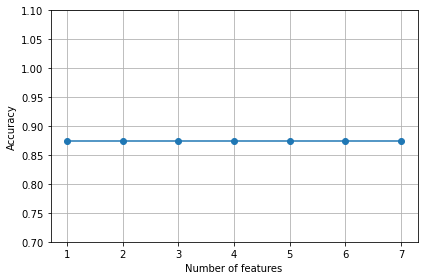

In [86]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

In [87]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.8709677419354839
Test accuracy: 0.875


*По данному обучению видно, что все данные нужны в обучение.Так как у всех признаков очень хорошая вероятность после обучения.Также были добавлены признаки в начале моуля.*

*Сохраняем обработанные данные для дольнейшей работы*

In [90]:
data.to_csv("meeting/data_3.csv")

### 1.4 Подготовка отчета

*В данном модули были собраны данные с интернет-ресурса **habr.com** и с представленного файл.Произведено предварительное следование данных для того, что-бы понять, какой конкретно метод обработки использовать.Произведена предобработка данных для дальнейшего обучения модели и разработки api.Также были отобраны признаки, которые больше всего зависят от целевой переменной, а также предварительная обрабоотка текста, что бы разделение на кластеры было более качественно сделано.По итогу файл с предобработанными данными был загружен, для дальнейшего использования.*